In [2]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import sys
import os
import seaborn
from  matplotlib import pyplot
import scale_setters as scale

In [3]:
def delta(x, c, z):
    n = len(x)
    sum1 = 0
    sum2 = 0
    sum3 = 0
    for i in range(n):
        sum1 += z[i]/c[i]
        sum2 += z[i]/c[i] * x[i]**2
        sum3 += z[i]/c[i] * x[i]
    return sum1 * sum2 - sum3**2

def sigma_a(x, c, z):
    n = len(x)
    sum = 0
    for i in range(n):
        sum += z[i]/c[i] * x[i]**2
    return sum / delta(x, c, z)

def make_c(Nt_arr):
    c = []
    for Nt in Nt_arr:
        c.append(Nt**12)
    sum = 0
    for i in c:
        sum += i
    for i in range(len(c)):
        c[i] = c[i] / sum
    return c

def make_z(Nt_arr, p):
    c = []
    for Nt in Nt_arr:
        c.append(Nt**p)
    sum = 0
    for i in c:
        sum += i
    for i in range(len(c)):
        c[i] = c[i] / sum
    return c


def calculate_sigma(Nt_arr, p):
    x = []
    for Nt in Nt_arr:
        x.append(1/Nt**2)
    c = make_c(Nt_arr)
    z = make_z(Nt_arr, p)
    return sigma_a(x, c, z)

def optimize(Nt_arr, p_arr):
    sigma_arr = []
    for p in p_arr:
        sigma_arr.append(calculate_sigma(Nt_arr, p))

    return sigma_arr, p_arr    

Text(6.674999999999997, 0.5, '$\\sigma_{a}$')

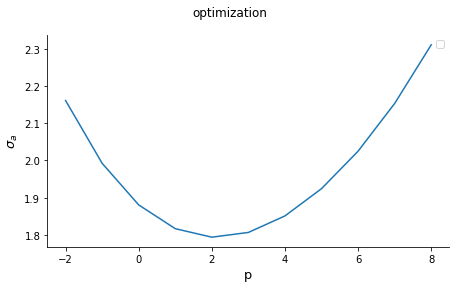

In [9]:
Nt_arr = [4, 5, 6]
p_arr = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

sigma_arr, p_arr = optimize(Nt_arr, p_arr)

data = pd.DataFrame(list(zip(p_arr, sigma_arr)), columns = ['p', 'sigma'])

fg = seaborn.FacetGrid(data=data, height=4, aspect=1.6, legend_out=False)
fg.fig.suptitle('optimization')
fontsize = 13
fg.map(plt.plot, 'p', 'sigma').add_legend()
fg.ax.set_xlabel('p', fontsize=fontsize)
fg.ax.set_ylabel(r'$\sigma_{a}$', fontsize=fontsize)